# Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Your Name</h2>

# Data

In [36]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Read csv
data = pd.read_csv("churn.csv")
data.head(15)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


In [4]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analys missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [6]:
data.isnull().sum() #Get the number of null values per column

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

# Exploratory Data Analysis

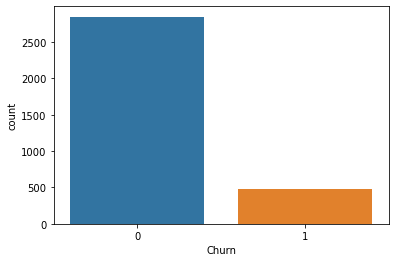

In [9]:
# Our label Distribution (countplot)
sns.countplot(data['Churn']);

<AxesSubplot:xlabel='DataUsage'>

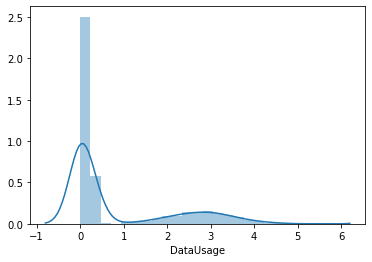

In [25]:
sns.distplot(data['DataUsage'])

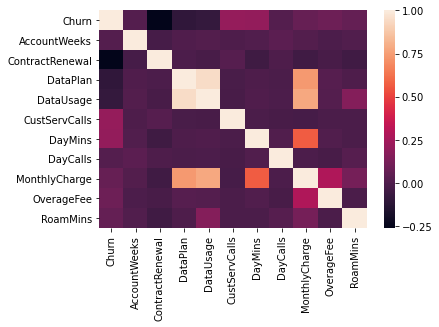

In [17]:
sns.heatmap(data.corr());

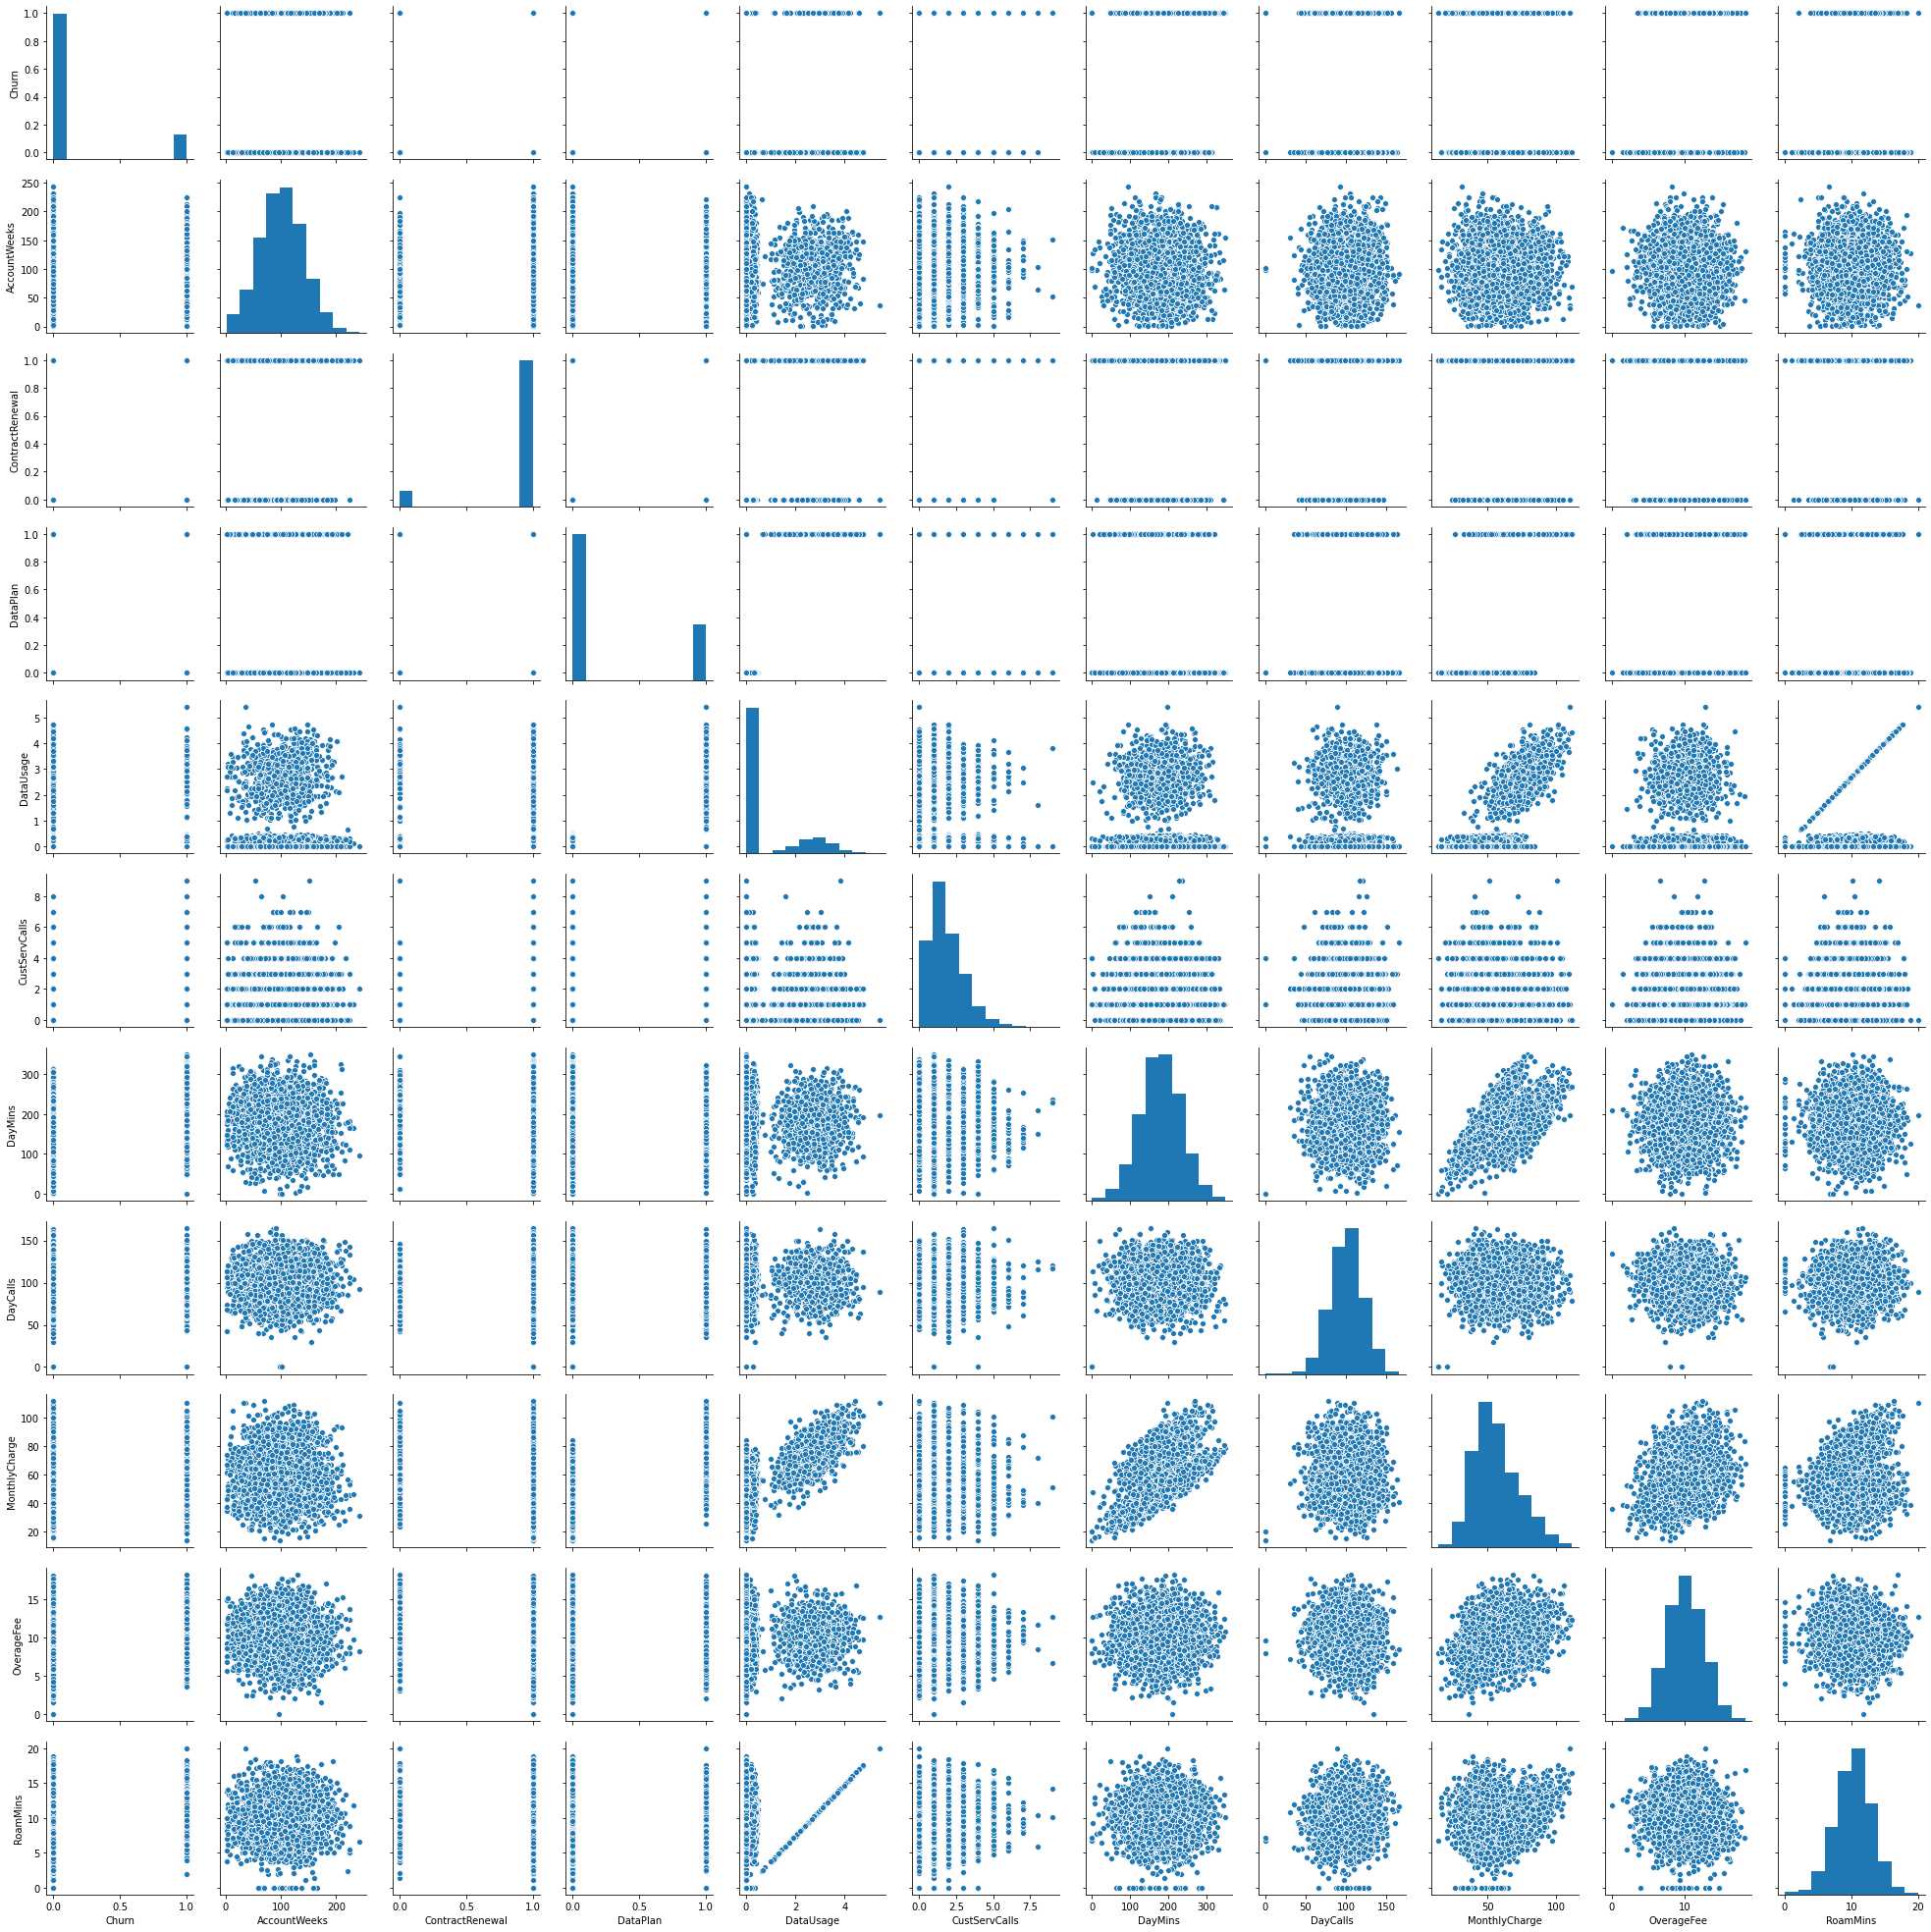

In [23]:
sns.pairplot(data)

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [29]:
sum(data.duplicated()) #The number of duplicates

0

In [46]:
col = df.columns.to_list()
col.pop(0)

'Churn'

In [41]:
df = data/data.max()
df.tail()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3328,0.0,0.790123,1.0,1.0,0.494444,0.222222,0.445268,0.466667,0.644205,0.592633,0.495
3329,0.0,0.279835,1.0,0.0,0.062963,0.333333,0.658780,0.345455,0.506739,0.421660,0.480
3330,0.0,0.115226,1.0,0.0,0.000000,0.222222,0.515393,0.660606,0.503145,0.793843,0.705
3331,0.0,0.757202,0.0,0.0,0.000000,0.222222,0.609464,0.636364,0.449236,0.438703,0.250
3332,0.0,0.304527,1.0,1.0,0.685185,0.000000,0.668187,0.684848,0.898473,0.731171,0.685


In [54]:
X_train, X_test, y_train, y_test = train_test_split(df[col],data['Churn'], test_size=0.3, random_state=1, stratify=data['Churn'])

In [55]:
X_train.tail(10)

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
2375,0.209877,1.0,0.0,0.057407,0.222222,0.147662,0.648485,0.288410,0.632765,0.520
368,0.543210,1.0,0.0,0.040741,0.111111,0.237742,0.666667,0.325247,0.638263,0.380
2244,0.609053,1.0,0.0,0.000000,0.111111,0.682155,0.509091,0.521114,0.538208,0.545
3101,0.440329,1.0,1.0,0.409259,0.111111,0.382554,0.612121,0.566936,0.582738,0.410
2363,0.477366,1.0,0.0,0.000000,0.000000,0.368871,0.509091,0.323450,0.432655,0.665
461,0.473251,1.0,0.0,0.000000,0.333333,0.421608,0.660606,0.404313,0.627817,0.480
3057,0.489712,1.0,0.0,0.000000,0.111111,0.268529,0.654545,0.350404,0.726223,0.365
2616,0.679012,1.0,1.0,0.800000,0.000000,0.318130,0.848485,0.729560,0.586586,0.800
1866,0.489712,1.0,0.0,0.000000,0.222222,0.233466,0.454545,0.323450,0.697636,0.445
1846,0.493827,1.0,1.0,0.575926,0.111111,0.507127,0.709091,0.692722,0.481583,0.575


# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss
from xgboost import XGBClassifier

### Decision Tree

In [107]:
dt = DecisionTreeClassifier(max_features = 8, max_depth = 4, random_state = 1)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_test)

In [108]:
print(f"Train loss: {log_loss(y_train,dt.predict_proba(X_train))}")
print(f"Test loss: {log_loss(y_test,y_pred)}")

Train loss: 0.2220457994523468
Test loss: 0.23947575706602514


In [116]:
pd.DataFrame(data = np.array([col,dt.feature_importances_]).T, columns = ['Feature', 'Importance'])

,Feature,Importance
0,AccountWeeks,0.0
1,ContractRenewal,0.15339858631842246
2,DataPlan,0.1160970753775259
3,DataUsage,0.0
4,CustServCalls,0.1552904496612736
5,DayMins,0.3892738691361141
6,DayCalls,0.0
7,MonthlyCharge,0.0
8,OverageFee,0.06815125913403663
9,RoamMins,0.11778876037262721


### Random Forest

In [113]:
rfc = RandomForestClassifier(n_estimators = 200,max_features = 7, max_depth = 5, random_state = 1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict_proba(X_test)

In [114]:
print(f"Train loss: {log_loss(y_train,rfc.predict_proba(X_train))}")
print(f"Test loss: {log_loss(y_test,y_pred)}")

Train loss: 0.1708739412903982
Test loss: 0.20428696698543555


In [115]:
pd.DataFrame(data = np.array([col,rfc.feature_importances_]).T, columns = ['Feature', 'Importance'])

,Feature,Importance
0,AccountWeeks,0.012518644431079353
1,ContractRenewal,0.13203013633876715
2,DataPlan,0.043890446247233345
3,DataUsage,0.0780804219114962
4,CustServCalls,0.13362964929066937
5,DayMins,0.27869673480340607
6,DayCalls,0.01483114443045212
7,MonthlyCharge,0.14092800580485443
8,OverageFee,0.07940924642942548
9,RoamMins,0.0859855703126169


### XGBoost

In [136]:
xgb = XGBClassifier(n_estimators = 100, eta = 0.075, reg_lambda = 0.9, max_depth = 4, random_state = 1, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict_proba(X_test)

In [137]:
print(f"Train loss: {log_loss(y_train,xgb.predict_proba(X_train))}")
print(f"Test loss: {log_loss(y_test,y_pred)}")

Train loss: 0.1338729527072348
Test loss: 0.19798333298834042


In [139]:
pd.DataFrame(data = np.array([col,xgb.feature_importances_]).T, columns = ['Feature', 'Importance'])

,Feature,Importance
0,AccountWeeks,0.025244718
1,ContractRenewal,0.14232492
2,DataPlan,0.1568468
3,DataUsage,0.08168691
4,CustServCalls,0.16934521
5,DayMins,0.14961521
6,DayCalls,0.027521262
7,MonthlyCharge,0.11582885
8,OverageFee,0.05979049
9,RoamMins,0.07179556


# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

### The best performing model as seen from the training section is the Extreme gradient boosting classifier (XGBClassifier). This model perform better because of its underlying boosting technique and is preferred over the decision tree or random forest.

## Discussion of result
> As seen above, the logarithmic loss of the XGBclassifier is ```0.19798```. The ```predict_proba``` method was use so the maximum probability is outputted and the loss is dropped. Without it, the logarithmic loss would have been above 2 since in that case, class labels are predicted. 

## To improve model performance:

>- The hyperparameters of our XGBClassifier can be further tuned. 
>- Also, other algorithms like the Light gradient boosting classifier, Categorical boosting classifier and so on can be applied. 
>- As seen from the feature importances of the different models, some features do not meaningfully contribute to the learning. These can be removed to reduce the size of the model.
>- New features can be created to inprove model performance.